###**SECTION 25 : TERRAFORM**

|PLAN|
|----|
276. Introduction et Exercice 1
277. Exercice 2 - Variables
278. Exercice 3 - Approvisionnements
279. Exercice 4 - Sortie
280. Exercice 5 - Backend
281. Exercice 6 - Multi-ressources
282. Service AWS Elastic Kubernetes

###**276. Introduction et Exercice 1**

####**Introduction**

+ IAAC | Automatiser l'infrastructure
+ Définir l'état de l'infrastructure
+ Ansible, Puppet ou chef automates principalement les tâches liées au système d'exploitation.
   + Définit l'état des machines
+ Terraform autoamtes infra lui-même
   + Comme AWS, GCP, Azure, Digital Ocean, etc.
+ Teraform fonctionne avec des logiciels d'automatisation comme ansible une fois qu'infra est configuré et prêt.
+ Pas de programmation, sa propre syntaxe similaire à JSON.

####**Tout doit être automatisé**
+ Automatisation de l'infrastructure centralisée.

####**Installation**
+ Téléchargez le binaire Terraform depuis son site Web
   +Linux
   +Mac
   + Fenêtres
+ Binaire stocké dans le `PATH` exporté
   + ex:g: => /usr/local/bin
####**Lancer l'instance ec2**
+ Compte AWS
+ Utilisateur IAM avec clés d'accès
+ Instance de lancement de fichier Terraform.
+ Exécuter terraform appliquer.

####**EXERCICE**
+ Écrire le fichier instance.tf
+ Instance de lancement
+ Apportez quelques modifications au fichier instance.tf.
+ Appliquer les modifications.

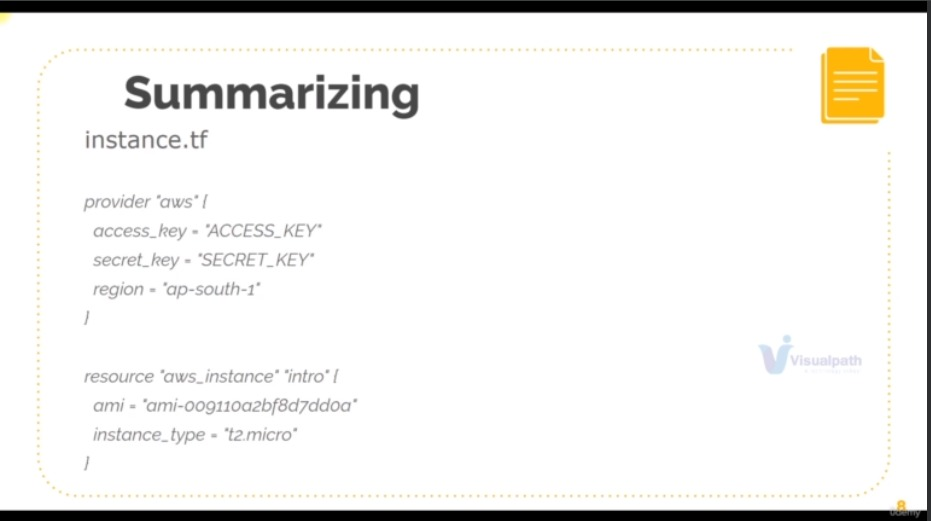

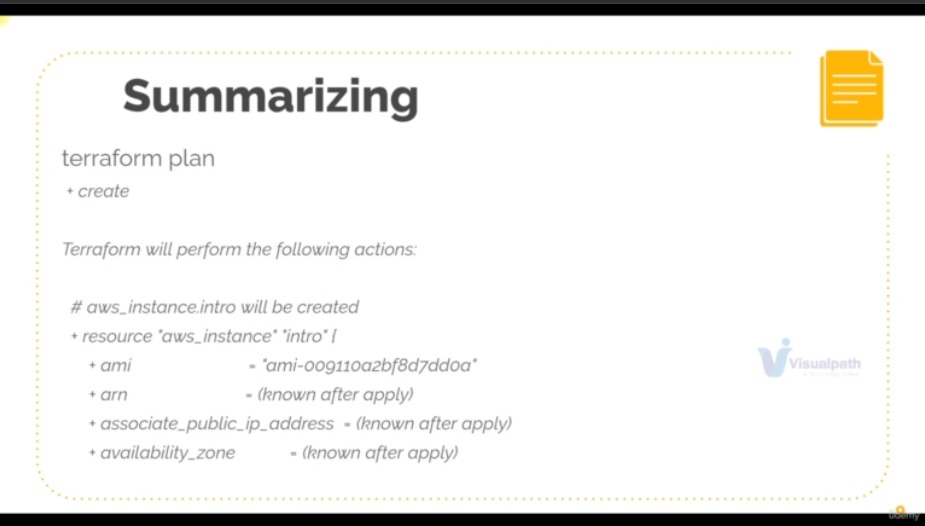



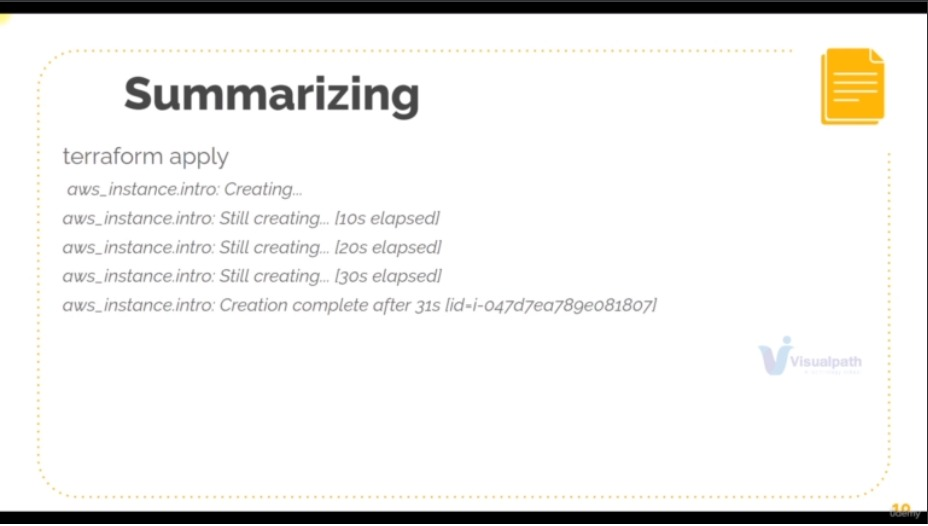

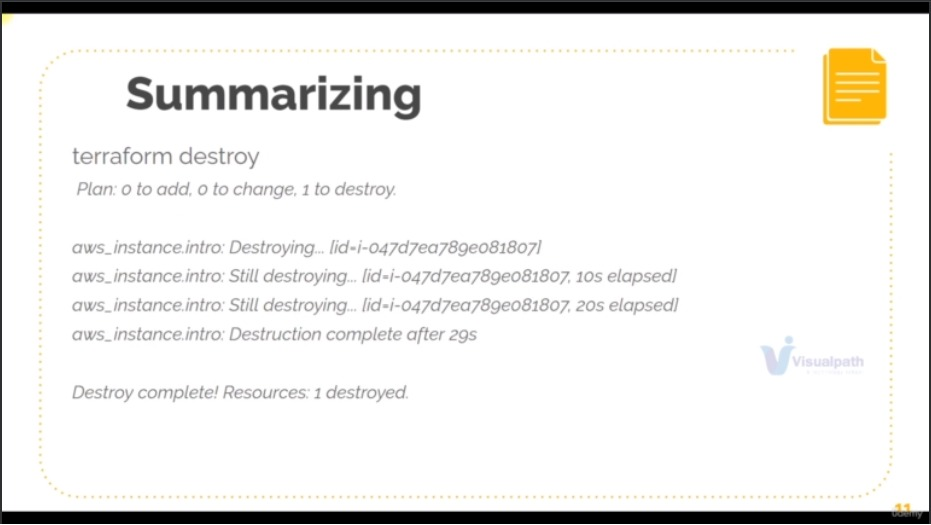

####**Installation**

In [ ]:
choco install terraform
choco install awscli -y

In [ ]:
  501  aws configure
  502  terraform --help
  503  cd /c/
  504  mkdir terraform-scripts
  505  cd terraform-scripts/
  506  mkdir exercice1
  507  cd exercice1/
  508  ls
  509  cat first_instance.tf
  515  terraform init
  517  ls -a
  518  ls .terraform/plugins/
  522  terraform validate
  524  terraform fmt
  525  cat first_instance.tf
  526  terraform plan
  527  terraform apply

  528  vim first_instance.tf
  ===========================================
  provider "aws" {
  region = "us-east-1"
  #	access_key = ""
  #	secret_key = ""
  }
  resource "aws_instance" "intro" {
    ami                    = "ami-08a52ddb321b32a8c"
    instance_type          = "t2.micro"
    availability_zone      = "us-east-1a"
    key_name               = "dove-key"
    vpc_security_group_ids = ["sg-0f8c4903a0b917c2c"]
    tags = {
      Name    = "Dove-Instance"
      Project = "Dove"
    }
  }
======================================================

  529  cat first_instance.tf
  530  terraform validate
  531  terraform fmt
  533  terraform plan
  534  terraform apply
  535  ls
  536  cat terraform.tfstate
  537  ls
  538  cat terraform.tfstate.backup
  539  terraform destroy

###**Exercices : Variables**

####**Variables**
+ Move secrets to another file.
+ Value that change change
  + AMI, tags, keypait, etc.
+ Reuse your code

####**EXERCICE**
+ Write providers.tf file
+ Write vars.tf file
+ Write instance.tf file
+ Apply Changes
+ Make some changes to instance.tf file
+ Apply changes.

+ ***instance.tf***

In [ ]:
provider "aws" {
    #access_key = "ACCESS_KEY"
    #secret_key = "SECRET_KEY"
    region = "ap-south-1"
}

resource "aws_instance" "intro" {
    ami = "ami-08a52ddb321b32a8c"
    instance_type = "t2.micro"
}

+ ***providers.tf***

In [ ]:
provider "aws" {
    region = var.REGION
}

+ ***terraform.tfvars***

In [ ]:
AWS_ACCESS_KEY = ""
AWS_SECRET_KEY = ""

+ ***vars.tf***

In [ ]:
variable AWS_ACCESS_KEY []
variable AWS_SECRET_KEY []
variable REGION {
    default = "us-west-1"
}
variable AMIS {
    type = "map"
    default {
        us-west-1 = "ami-06397100adf427136"
        us-west-2 = "ami-a042f4d8"
    }
}

+ ***instance.tf***

In [ ]:
resource "aws_instance" "intro" {
    ami = var.AMIS[var.REGION]
    instance_type = "t2.micro"
}

####**Commandes**

In [ ]:
 499  cd /c/terraform-scripts/exercice2
  500  terraform init
  501  terraform validate
  502  terraform fmt
  503  cat instance.tf
  504  cat vars.tf
  505  terraform plan
  506  terraform apply
  507  terraform plan
  508  terraform destroy
  509  history

###**Exercice3 : Provisionning**

####**Provisionnement**
+ Construire des images personnalisées avec des outils comme packer
+ Utilisez l'image standard et utilisez l'approvisionneur pour configurer les logiciels et les fichiers.
   + Téléchargements de fichiers
   + remote_exec
   + Ansible, Puppet ou Chef

####**Connexion de l'approvisionneur**
+ Nécessite une connexion pour le provisionnement.

In [ ]:
# SSH
provisioner "file" {
    source = "files/test.conf"
    destination = "/etc/test.conf"
}

connection {
    type = "ssh"
    user = "root"
    password = "var.root_password"
}

# WinRM

provisioner "file" {
    source = "conf/myapp.conf"
    destination = "c:/App/myapp.conf"
}

connection {
    type = "winrm"
    user = "Administrator"
    password = "var.admin_password"
}

####**Plus d'approvisionneur**

+ Le fournisseur `file` est utilisé pour copier des fichiers ou des répertoires
+ `remote-exec` invoque une commande/un script sur une ressource distante.
+ L'approvisionneur `local-exec` invoque un exécutable local après la création d'une ressource.
+ L'approvisionneur `puppet` installe, configure et exécute l'agent Puppet sur une ressource distante
   + Prend en charge les connexions de type `ssh` et `winrm`.
+ L'approvisionneur `Chef` installe, configure et exécute le Client Chef sur une ressource distante.
   + Prend en charge les connexions de type `ssh` et `winrm`
+ Ansible : exécutez terraform, adresse IP de sortie, exécutez le playbook avec `local-exec`



In [ ]:
# Variables
variable "PRIV_KEY_PATH" {
    default = "inf-inst_key"
}

variable "PUB_KEY_PATH" {
    default = "infi-inst_key"
}

variable "USER" {
    default = "ubuntu"
}

# Key Pair & Instance Resources

resource "aws_key_pair" "dove-key" {
    key_name = "dovekey"
    public_key = file("dovekey.pub")
}

resource "aws_instance" "intro" {
    ami = var.AMIS[var.REGION]
    instance_type = "t2.micro"
    availability_zone = var.ZONE1
    key_name = aws_key_pair.dove-key.key_name
    vpc_security_group_ids = ["sg-833e24fd"]
}


####**File Provisioner**

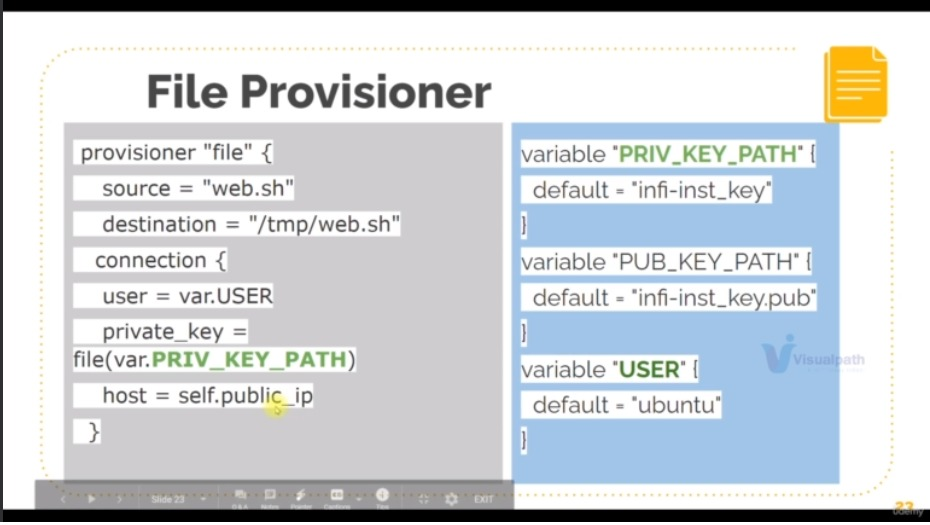

In [ ]:
# Remote-exec Provisioner

provisioner "remote-exec" {
    inline = [
        "chmod u+x /tmp/web.sh",
        "sudo /tmp/web.sh"
    ]
}

####**Exercice**
+ Generate key pair
+ Write Script
+ Write providers.tf
+ Write vars.tf
+ Write instances.tf
  + key pair resource
  + aws_instance resource
    + provisioners
      + file
      + remote-exec
+ Apply changes

In [ ]:
  499  cd /c/terraform-scripts/exercice3
  500  ls
  501  terraform init
  502  terraform validate
  503  terraform fmt
  504  terraform plan
  505  terraform apply
  509  terraform destroy

###**EXERCICE4 : Sortie**

####**Output Information**

+ Terrafrom stores returned value of all resources created.
  + e:g `aws_instance` ressource has the attribute `public_ip`
+ Use output block to print these attributes
+ `local-exec` to save info to a file

####**Output Attributes**

In [ ]:
output "instance_ip_addr" {
    value = aws_instance.server.public_ip
}

Elements => resourceType.resourceName.attributeName
      resourceType => aws_instance
      resourceName => server
      attributeName => public_ip

####**Store Output in File**

In [ ]:
resource "aws_instance" "out_inst" {
    ami = var.AMIS[var.REGION]
    instance_type = "t2.micro"
    key_name = aws_key_pair.dino-key.key-name

provisioner "loacl-exec" {
    command = "echo aws_instance.out_inst.private_ip >> private_ips.txt"
  }
}

####**EXERCICE6: Multi-ressources**

+ https://registry.terraform.io/providers/hashicorp/aws/latest/docs

####**282. AWS Elastic Kubernetes Service**

+ https://docs.aws.amazon.com/eks/latest/userguide/create-kubeconfig.html

In [ ]:
choco install kubernets-cli -y